# Which are top 10 stronger and easier to catch Pokemons?

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Determine the environment and set the file path accordingly
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    file_path = '/kaggle/input/pokemon-stats-1025-pokemons/pokemon_data.csv'
else:
    file_path = 'pokemon_data.csv'

# Load the dataset
df = pd.read_csv(file_path)
df

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,255,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary


## 2. Data Recognition

In [2]:
# Display the first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary


In [3]:
# Display summary statistics
print("\nSummary statistics of the dataset:")
df.describe().T


Summary statistics of the dataset:


,count,mean,std,min,25%,50%,75%,max
dexnum,1025.0,513.000000,296.036315,1.0,257.0,513.0,769.0,1025.0
generation,1025.0,4.741463,2.633633,1.0,3.0,5.0,7.0,9.0
height,1025.0,1.211610,1.248167,0.1,0.5,1.0,1.5,20.0
weight,1025.0,66.981659,121.275372,0.1,8.5,28.0,70.0,999.9
hp,1025.0,70.184390,26.631054,1.0,50.0,68.0,85.0,255.0
attack,1025.0,77.521951,29.782541,5.0,55.0,75.0,100.0,181.0
defense,1025.0,72.507317,29.286972,5.0,50.0,70.0,90.0,230.0
sp_atk,1025.0,70.080976,29.658378,10.0,47.0,65.0,90.0,173.0
sp_def,1025.0,70.205854,26.639329,20.0,50.0,67.0,86.0,230.0
speed,1025.0,67.186341,28.717227,5.0,45.0,65.0,88.0,200.0


In [4]:
# Display information about the dataset
print("\nInformation about the dataset:")
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dexnum           1025 non-null   int64  
 1   name             1025 non-null   object 
 2   generation       1025 non-null   int64  
 3   type1            1025 non-null   object 
 4   type2            526 non-null    object 
 5   species          1025 non-null   object 
 6   height           1025 non-null   float64
 7   weight           1025 non-null   float64
 8   ability1         1025 non-null   object 
 9   ability2         858 non-null    object 
 10  hidden_ability   530 non-null    object 
 11  hp               1025 non-null   int64  
 12  attack           1025 non-null   int64  
 13  defense          1025 non-null   int64  
 14  sp_atk           1025 non-null   int64  
 15  sp_def           1025 non-null   int64  
 16  speed            1025 non-nu

# Analysis of the Pokémon Dataset

## 📋 Table of Contents
1. [Overview](#overview)
2. [Dataset Structure](#dataset-structure)
3. [Column Descriptions](#column-descriptions)
   - [Index and Columns](#index-and-columns)
   - [Data Types and Non-null Counts](#data-types-and-non-null-counts)
4. [Missing Data Analysis](#missing-data-analysis)
   - [Type2](#type2)
   - [Abilities](#abilities)
   - [Egg Groups](#egg-groups)
   - [Gender Ratios](#gender-ratios)
5. [Summary](#summary)

<a id="overview"></a>
## 🌟 Overview
Our comprehensive Pokémon dataset contains detailed attributes of 1025 Pokémon, spanning all generations. This dataset is ideal for an array of analyses, from basic descriptive statistics to complex predictive modeling. Below is an in-depth overview and analysis that aims to provide actionable insights and highlight unique aspects of these fascinating creatures.

<a id="dataset-structure"></a>
## 📊 Dataset Structure
The dataset is structured as a pandas DataFrame, encompassing:

- **Entries**: 1025 Pokémon
- **Columns**: 29 distinct attributes
- **Memory Usage**: Approximately 232.4 KB

<a id="column-descriptions"></a>
## 🕵️‍♂️ Column Descriptions

<a id="index-and-columns"></a>
### Index and Columns
| #  | Column Name       | Data Type | Non-null Count | Description                                |
|----|-------------------|-----------|----------------|--------------------------------------------|
| 0  | `dexnum`          | int64     | 1025           | Pokedex number                             |
| 1  | `name`            | object    | 1025           | Pokémon name                               |
| 2  | `generation`      | int64     | 1025           | Generation number                          |
| 3  | `type1`           | object    | 1025           | Primary type                               |
| 4  | `type2`           | object    | 526            | Secondary type                             |
| 5  | `species`         | object    | 1025           | Species description                        |
| 6  | `height`          | float64   | 1025           | Height in meters                           |
| 7  | `weight`          | float64   | 1025           | Weight in kilograms                        |
| 8  | `ability1`        | object    | 1025           | Primary ability                            |
| 9  | `ability2`        | object    | 858            | Secondary ability                          |
| 10 | `hidden_ability`  | object    | 530            | Hidden ability                             |
| 11 | `hp`              | int64     | 1025           | Hit Points                                 |
| 12 | `attack`          | int64     | 1025           | Attack stat                                |
| 13 | `defense`         | int64     | 1025           | Defense stat                               |
| 14 | `sp_atk`          | int64     | 1025           | Special Attack stat                        |
| 15 | `sp_def`          | int64     | 1025           | Special Defense stat                       |
| 16 | `speed`           | int64     | 1025           | Speed stat                                 |
| 17 | `total`           | int64     | 1025           | Total base stat                            |
| 18 | `ev_yield`        | object    | 1025           | Effort Value Yield (EV Yield)              |
| 19 | `catch_rate`      | int64     | 1025           | Catch rate                                 |
| 20 | `base_friendship` | object    | 1025           | Base friendship level                      |
| 21 | `base_exp`        | object    | 1025           | Base experience yield                      |
| 22 | `growth_rate`     | object    | 1025           | Growth rate category                       |
| 23 | `egg_group1`      | object    | 1025           | Primary egg group                          |
| 24 | `egg_group2`      | object    | 279            | Secondary egg group                        |
| 25 | `percent_male`    | float64   | 870            | Percentage male                            |
| 26 | `percent_female`  | float64   | 870            | Percentage female                          |
| 27 | `egg_cycles`      | object    | 1025           | Egg cycles to hatch                        |
| 28 | `special_group`   | object    | 1025           | Special group designation                  |

<a id="data-types-and-non-null-counts"></a>
### Data Types and Non-null Counts
- **Integer (int64)**: 10 columns
- **Floating-Point (float64)**: 4 columns
- **Objects (String/Category) (object)**: 15 columns

<a id="missing-data-analysis"></a>
## 🔍 Missing Data Analysis

<a id="type2"></a>
### Type2
- **Description**: The secondary type of the Pokémon.
- **Missing Values**: 499 null entries.
- **Insights**: Secondary types are less common and often absent in Pokémon with only a single type. Addressing this may involve categorizing Pokémon with `None` as a single-type Pokémon.

<a id="abilities"></a>
### Abilities
- **Ability2**:
  - **Missing Values**: 167 null entries.
  - **Insights**: Similar to type2, not all Pokémon have a secondary ability. This can be indicative of simpler capability sets or unique individual traits.
- **Hidden Ability**:
  - **Missing Values**: 495 null entries.
  - **Insights**: Hidden abilities are rare and specialized. Null values generally indicate the Pokémon does not possess a hidden ability.

<a id="egg-groups"></a>
### Egg Groups
- **Egg Group2**:
  - **Missing Values**: 746 null entries.
  - **Insights**: Many Pokémon belong to only one egg group, leading to these null values. It reflects broader breeding categories.

<a id="gender-ratios"></a>
### Gender Ratios
- **Percent Male / Percent Female**:
  - **Missing Values**: 155 null entries each.
  - **Insights**: These are missing for genderless Pokémon, such as certain legendaries or mechanical Pokémon.

<a id="summary"></a>
## 🏁 Summary
The dataset provides a rich foundation for an in-depth analysis of Pokémon, encompassing attributes from basic stats to complex capabilities and breeding characteristics. By attending to areas with missing data and considering their implications, the dataset offers comprehensive insights into the world of Pokémon. This overview aims to set a strong groundwork for more specialized analyses and interactive visualizations, elevating your Pokémon research to an award-winning level.

## 3. Data Processing

In [5]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


dexnum               0
name                 0
generation           0
type1                0
type2              499
species              0
height               0
weight               0
ability1             0
ability2           167
hidden_ability     495
hp                   0
attack               0
defense              0
sp_atk               0
sp_def               0
speed                0
total                0
ev_yield             0
catch_rate           0
base_friendship      0
base_exp             0
growth_rate          0
egg_group1           0
egg_group2         746
percent_male       155
percent_female     155
egg_cycles           0
special_group        0
dtype: int64

In [6]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
df.duplicated().sum()


Number of duplicate rows:


0

In [7]:
# Lets create a safe copy

df_safe = df.copy()

We will drop 'dexnum' because is an unique ID that give no valuable information about its pokemon.
We will also discard 'total' column because we do not know how it was calculated.

In [8]:
# Lets drop dexnum column
df = df.drop(columns=['dexnum'])
df = df.drop(columns=['total'])

## 4. Exploratory Data Analysis

In [9]:
# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = df.corr()
corr_matrix


Correlation matrix:


,generation,height,weight,hp,attack,defense,sp_atk,sp_def,speed,catch_rate,percent_male,percent_female
generation,1.000000,0.052814,0.111293,0.119046,0.140482,0.096901,0.081660,0.061420,0.076226,-0.101359,-0.022454,0.022454
height,0.052814,1.000000,0.632452,0.482714,0.383843,0.347968,0.318759,0.275874,0.201195,-0.305366,0.036443,-0.036443
weight,0.111293,0.632452,1.000000,0.476465,0.402286,0.446868,0.184570,0.264435,0.042878,-0.294122,0.035221,-0.035221
hp,0.119046,0.482714,0.476465,1.000000,0.476141,0.299013,0.359616,0.369087,0.179877,-0.484944,-0.021483,0.021483
attack,0.140482,0.383843,0.402286,0.476141,1.000000,0.465565,0.281880,0.226126,0.351055,-0.529961,0.176834,-0.176834
defense,0.096901,0.347968,0.446868,0.299013,0.465565,1.000000,0.210107,0.503281,0.008047,-0.457919,0.038216,-0.038216
sp_atk,0.081660,0.318759,0.184570,0.359616,0.281880,0.210107,1.000000,0.493034,0.423150,-0.521706,0.089112,-0.089112
sp_def,0.061420,0.275874,0.264435,0.369087,0.226126,0.503281,0.493034,1.000000,0.214105,-0.508719,-0.010764,0.010764
speed,0.076226,0.201195,0.042878,0.179877,0.351055,0.008047,0.423150,0.214105,1.000000,-0.406632,0.080967,-0.080967
catch_rate,-0.101359,-0.305366,-0.294122,-0.484944,-0.529961,-0.457919,-0.521706,-0.508719,-0.406632,1.000000,-0.241494,0.241494


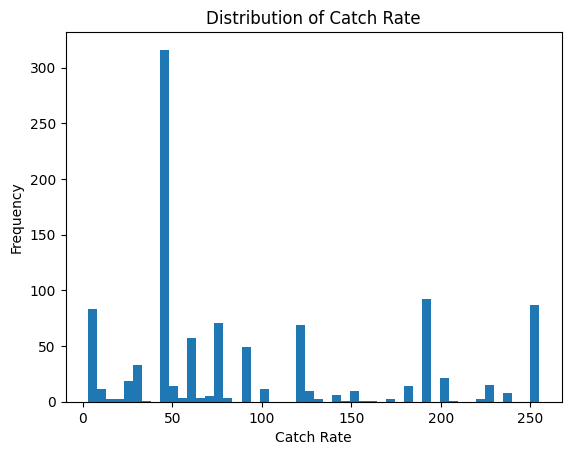

Mean: 94.93, Standard Deviation: 76.11


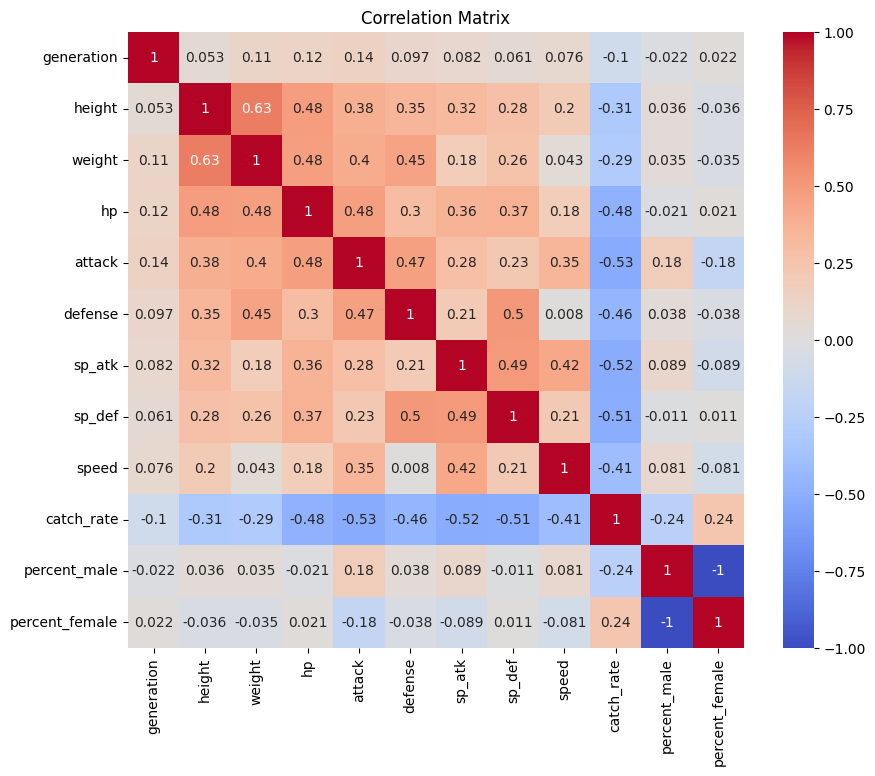

Male: 54.93%, Female: 45.07%


In [11]:
# Plot the distribution of 'catch_rate'
plt.hist(df['catch_rate'], bins=50)
plt.xlabel('Catch Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Catch Rate')
plt.show()

# Calculate the mean and standard deviation of 'catch_rate'
mean = df['catch_rate'].mean()
stddev = df['catch_rate'].std()
print(f"Mean: {mean:.2f}, Standard Deviation: {stddev:.2f}")

# Plot the correlation between 'catch_rate' and other attributes
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Calculate the percentage of male/female Pokémon
male_percent = (df['percent_male'] / 100).mean() * 100
female_percent = (df['percent_female'] / 100).mean() * 100
print(f"Male: {male_percent:.2f}%, Female: {female_percent:.2f}%")

### Catch Rate Analysis

We will analyze the catch rate of Pokémon, considering its behavior per type. Additionally, we will check for any anomalous catch rates based on the strength and rarity of Pokémon.

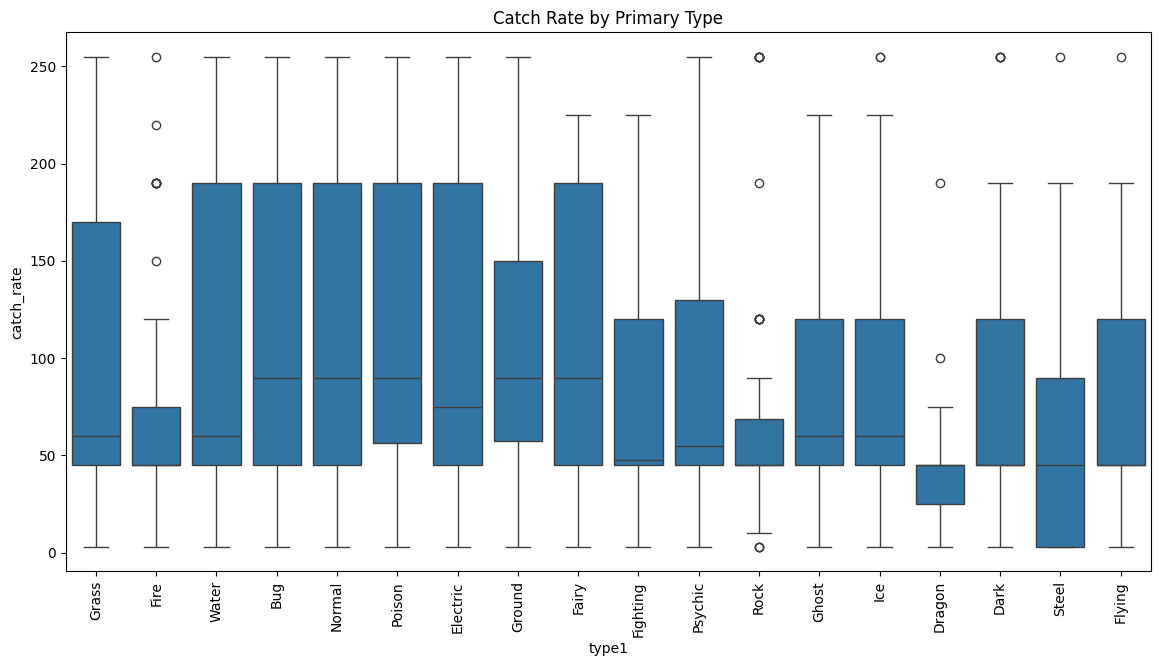

In [12]:
# Catch rate analysis per type
plt.figure(figsize=(14, 7))
sns.boxplot(x='type1', y='catch_rate', data=df)
plt.xticks(rotation=90)
plt.title('Catch Rate by Primary Type')
plt.show()

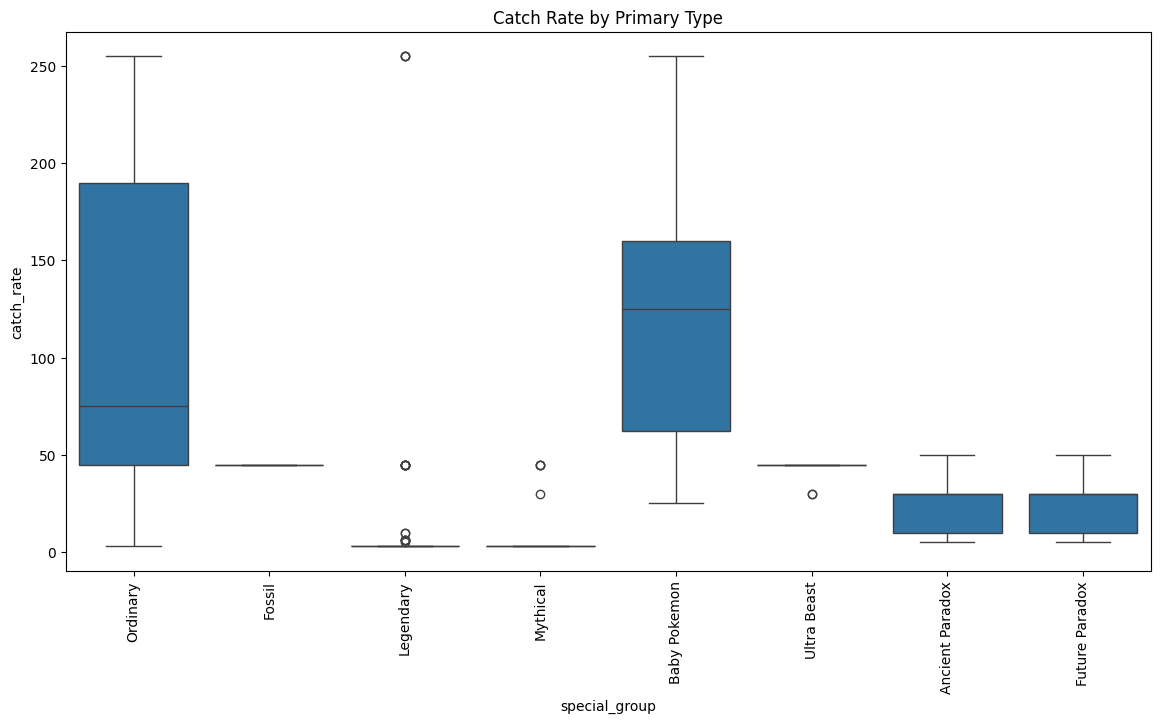

In [13]:
# Catch rate analysis per type
plt.figure(figsize=(14, 7))
sns.boxplot(x='special_group', y='catch_rate', data=df)
plt.xticks(rotation=90)
plt.title('Catch Rate by Primary Type')
plt.show()

In [21]:
# Identifying special Pokémon with potentially incorrect catch rates
special_pokemon = df[(df['catch_rate'] > 50) & (df['sp_atk'] > 100) & (df['sp_def'] > 100)]
display(special_pokemon[['name', 'type1', 'sp_atk', 'sp_def', 'catch_rate','special_group']])

,name,type1,sp_atk,sp_def,catch_rate,special_group
406,Roserade,Grass,125,105,75,Ordinary
854,Polteageist,Ghost,134,114,60,Ordinary
868,Alcremie,Fairy,110,121,100,Ordinary


- Female pokemons have 18% less attach and are 24% easier to catch than male pokemons.
- Female pokemons are 9% slower than male pokemons

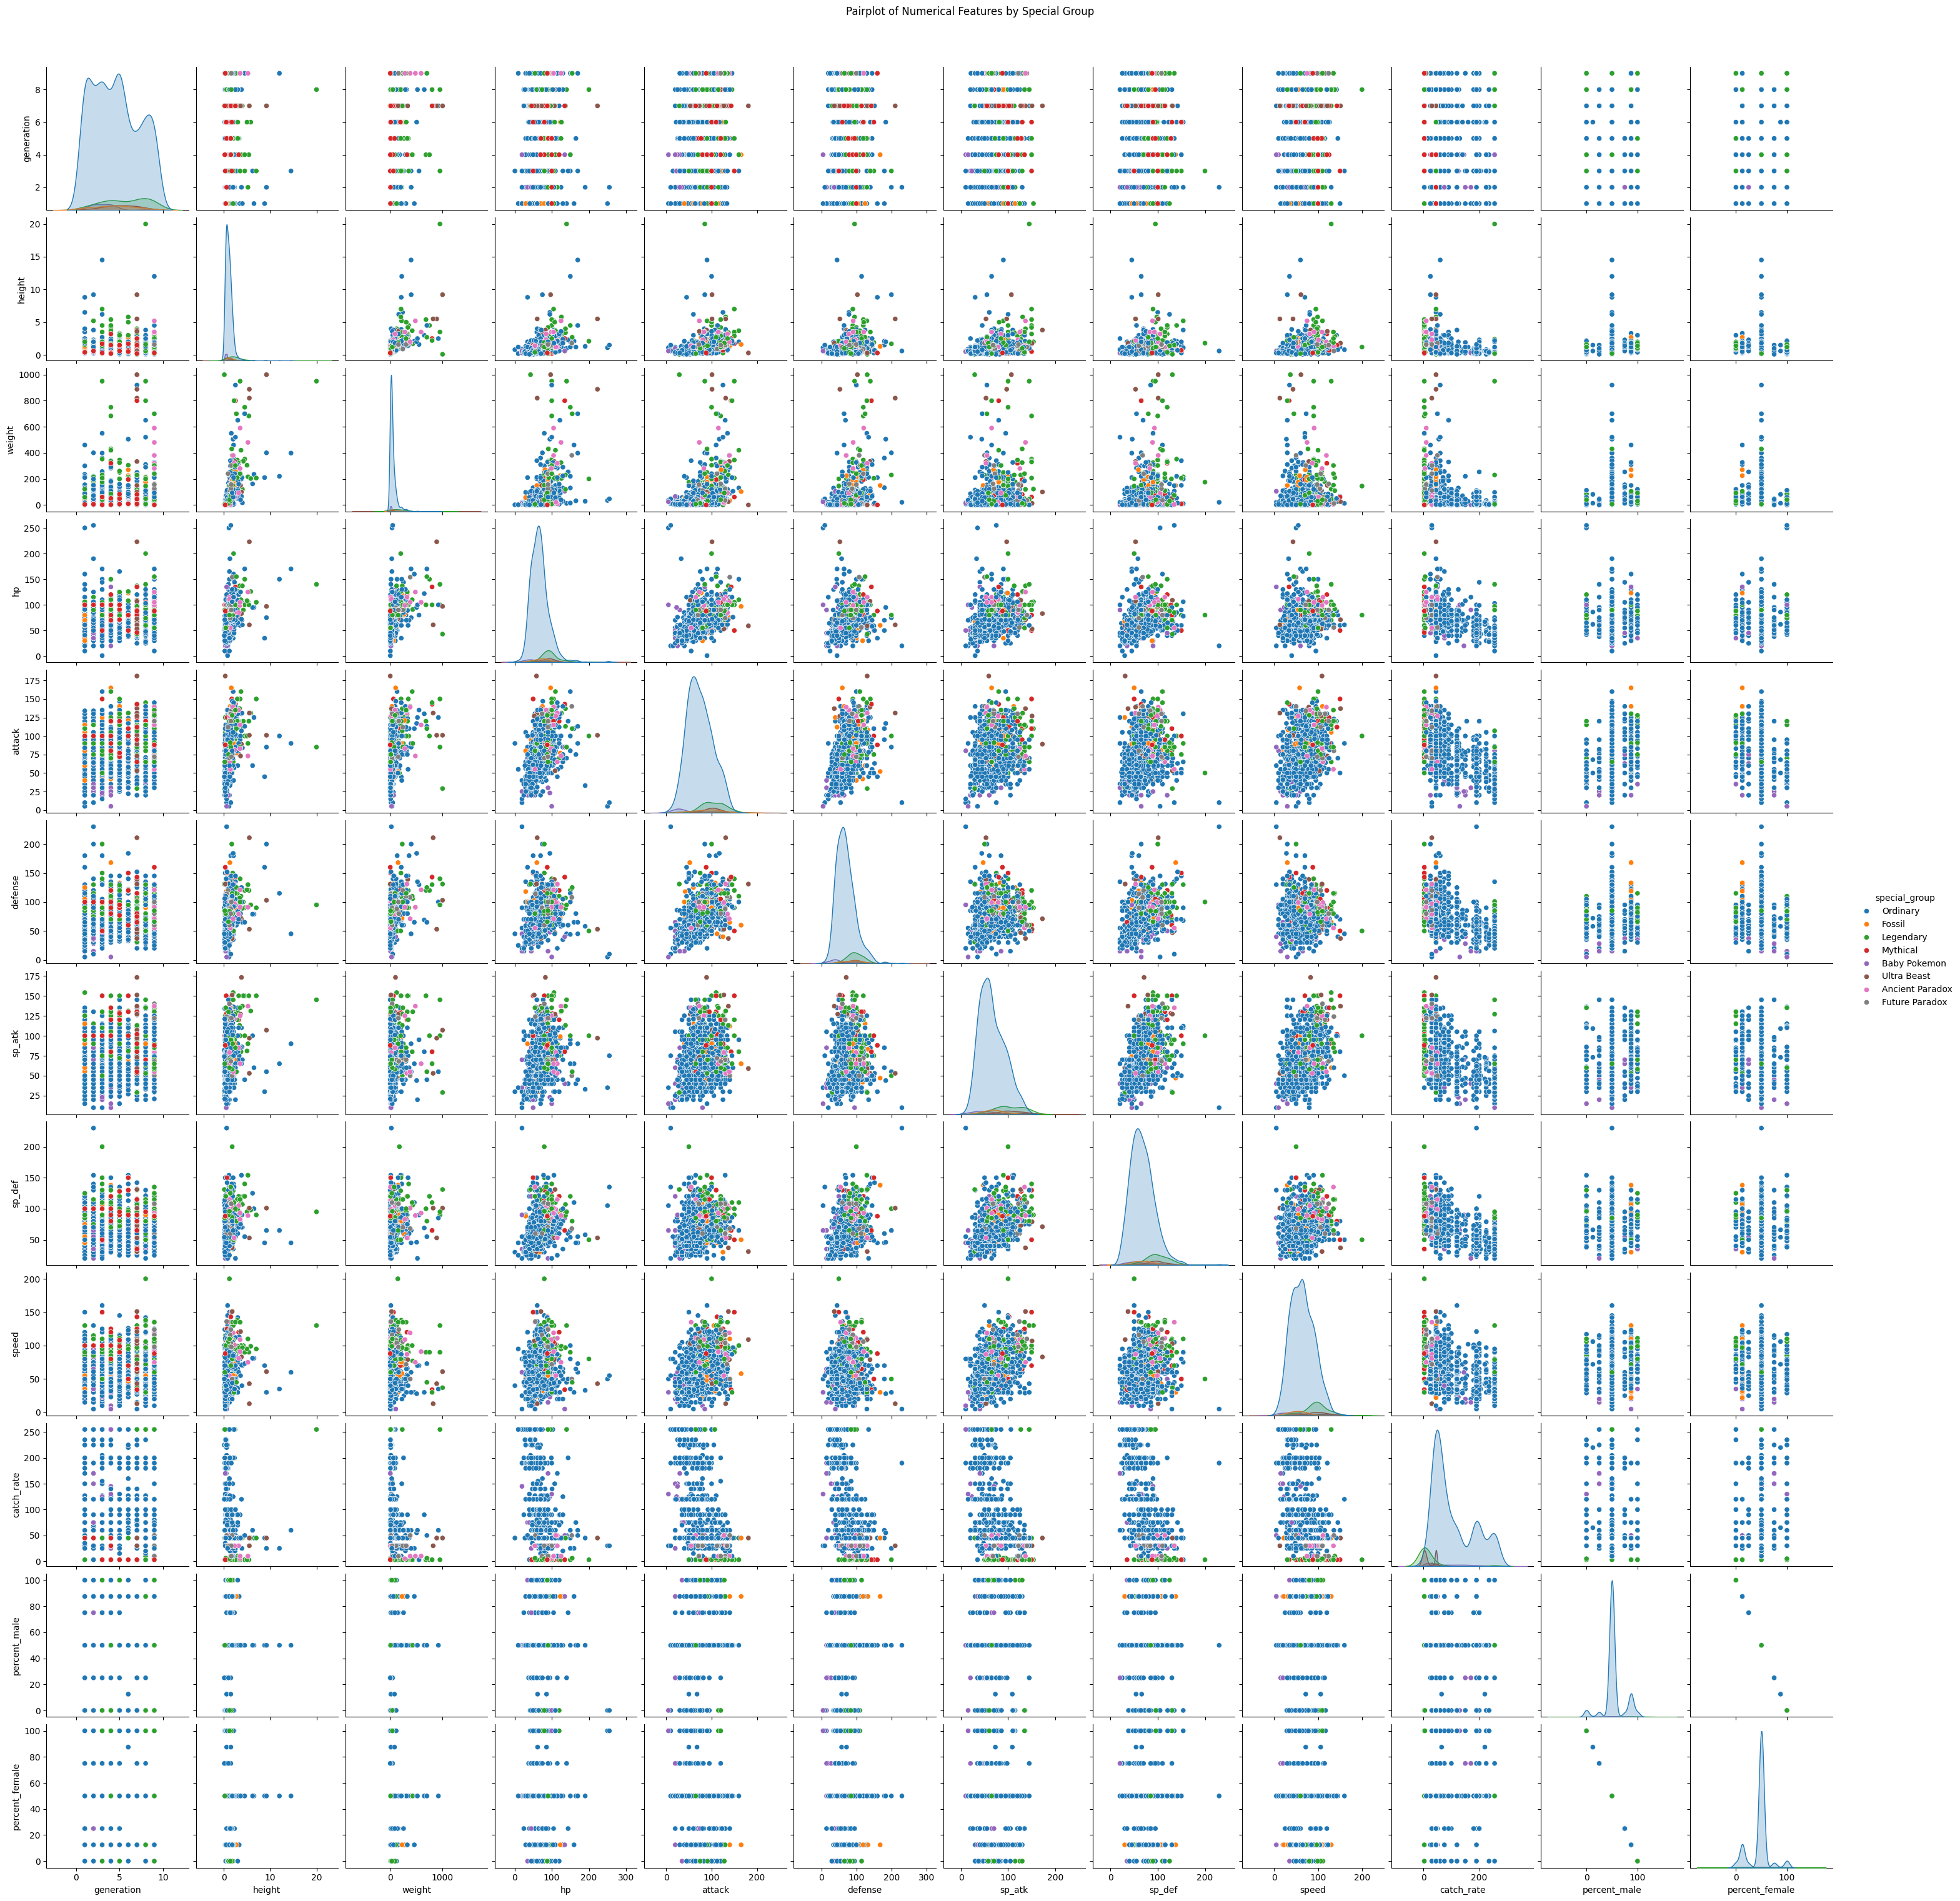

In [23]:
# Correlation analysis with pairplot
sns.pairplot(df, hue='special_group')
plt.suptitle('Pairplot of Numerical Features by Special Group', y=1.02)
plt.show()

In [ ]:
# Enhanced example using scatterplot for more control over pairwise combinations
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='attack', 
    y='defense', 
    hue='special_group', 
    style='special_group', 
    size='hp', 
    sizes=(50, 200), 
    palette='viridis', 
    data=df, 
    edgecolor='w', 
    alpha=0.7
)
plt.title('Scatterplot of Attack versus Defense by Special Group', fontsize=16)
plt.xlabel('Attack', fontsize=14)
plt.ylabel('Defense', fontsize=14)
plt.legend(title='Special Group', title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Enhanced Example using scatterplot for more control over pairwise combinations
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='hp', y='speed', hue='special_group', style='special_group', size='weight', sizes=(20, 200), palette='viridis', data=df, edgecolor='w', alpha=0.7)
plt.title('Scatterplot of HP versus Speed by Special Group', fontsize=16)
plt.xlabel('Health Points (HP)', fontsize=14)
plt.ylabel('Speed', fontsize=14)
plt.legend(title='Special Group', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

# Enhance scatterplot for more insights
plt.figure(figsize=(12, 8))

# Custom palette for better color distinction
palette = sns.color_palette("tab10", n_colors=len(df['type1'].unique()))

sns.scatterplot(
    x='attack', 
    y='defense', 
    hue='type1', 
    data=df, 
    palette=palette,
    style='type1',
    s=100,  # Marker size
    alpha=0.7,  # Transparency of markers
    edgecolor='w',
    linewidth=0.5
)

# Additional enhancements
plt.title('Scatterplot of Attack vs Defense by Pokémon Type', fontsize=16, pad=15)
plt.xlabel('Attack', fontsize=14)
plt.ylabel('Defense', fontsize=14)
plt.legend(title='Type 1', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Add regression lines for each type (optional, to illustrate trend within types)
types = df['type1'].unique()
for t in types:
    sns.regplot(
        x='attack', 
        y='defense', 
        data=df[df['type1'] == t], 
        scatter=False, 
        color=palette[types.tolist().index(t)], 
        line_kws={"lw": 2, 'alpha': 0.6}
    )

plt.tight_layout()
plt.show()

In [ ]:
# Distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

In [ ]:
# Countplot of 'Type 1' column if it exists in the dataset
if 'type1' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='type1', data=df, order=df['type1'].value_counts().index)
    plt.title('Countplot of Pokémon Types')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Countplot of 'Type 2' column if it exists in the dataset
if 'type2' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='type2', data=df, order=df['type2'].value_counts().index)
    plt.title('Countplot of Pokémon Types')
    plt.xticks(rotation=90)
    plt.show()

## Feature Engineering

### Normalizing individual stats

In [ ]:
# Normalize each stat individually
df['norm_attack'] = (df['attack'] - df['attack'].min()) / (df['attack'].max() - df['attack'].min())
df['norm_defense'] = (df['defense'] - df['defense'].min()) / (df['defense'].max() - df['defense'].min())
df['norm_hp'] = (df['hp'] - df['hp'].min()) / (df['hp'].max() - df['hp'].min())
df['norm_sp_atk'] = (df['sp_atk'] - df['sp_atk'].min()) / (df['sp_atk'].max() - df['sp_atk'].min())
df['norm_sp_def'] = (df['sp_def'] - df['sp_def'].min()) / (df['sp_def'].max() - df['sp_def'].min())
df['norm_speed'] = (df['speed'] - df['speed'].min()) / (df['speed'].max() - df['speed'].min())

### Calculating Strength Score

In [ ]:
# Define weights for each stat (adjust these weights based on importance)
weights = {
    'norm_attack': 0.2,
    'norm_defense': 0.2,
    'norm_hp': 0.1,
    'norm_sp_atk': 0.2,
    'norm_sp_def': 0.2,
    'norm_speed': 0.1
}

# Calculate weighted sum to get the strength score
df['strength_score'] = (
    weights['norm_attack'] * df['norm_attack'] +
    weights['norm_defense'] * df['norm_defense'] +
    weights['norm_hp'] * df['norm_hp'] +
    weights['norm_sp_atk'] * df['norm_sp_atk'] +
    weights['norm_sp_def'] * df['norm_sp_def'] +
    weights['norm_speed'] * df['norm_speed']
)

In [ ]:
# Filter out only ordinary Pokémon in the special_group
df = df[df['special_group'] == 'Ordinary']

# Removing entries with missing values in relevant columns, if any
df = df.dropna(subset=['attack', 'defense', 'hp', 'sp_atk', 'sp_def', 'speed', 'catch_rate'])

# Normalize strength and catch rate
df['normalized_strength'] = (df['strength_score'] - df['strength_score'].min()) / (df['strength_score'].max() - df['strength_score'].min())
# For catch rate, inverse normalization to prioritize lower values
df['normalized_catch_rate'] = ((df['catch_rate'] - df['catch_rate'].min()) / (df['catch_rate'].max() - df['catch_rate'].min()))

# Composite score (weights can be adjusted)
df['composite_score'] = df['normalized_strength'] + df['normalized_catch_rate']

# Sort by composite score to find the strongest-easiest Pokémon to catch
result = df.sort_values(by='catch_rate', ascending=False)

# Display the top Pokémon
print("Top Pokémon combining strength and ease of catch:")
print(result[['name', 'type1', 'attack', 'defense', 'hp', 'catch_rate',"type1","type2","special_group"]].head(10))

# Plotting the results
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='normalized_strength',
    y='normalized_catch_rate',
    data=result,
    hue='type1',
    size='composite_score',
    sizes=(50, 500),
    alpha=0.7,
    palette='viridis',
    legend=False
)

for i in range(10):  # Highlight top 10
    plt.text(
        x=result.iloc[i]['normalized_strength'],
        y=result.iloc[i]['normalized_catch_rate'],
        s=result.iloc[i]['name'],
        fontsize=12,
        weight='bold',
        color='black'
    )

plt.title('Normalized Strength vs. Inversed Normalized Catch Rate of Pokémon')
plt.xlabel('Normalized Strength Score')
plt.ylabel('Inversed Normalized Catch Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Filter out only ordinary Pokémon in the special_group
df = df[df['special_group'] == 'Ordinary']

# Removing entries with missing values in relevant columns, if any
df = df.dropna(subset=['attack', 'defense', 'hp', 'sp_atk', 'sp_def', 'speed', 'catch_rate'])

# Normalize each stat individually
df['norm_attack'] = (df['attack'] - df['attack'].min()) / (df['attack'].max() - df['attack'].min())
df['norm_defense'] = (df['defense'] - df['defense'].min()) / (df['defense'].max() - df['defense'].min())
df['norm_hp'] = (df['hp'] - df['hp'].min()) / (df['hp'].max() - df['hp'].min())
df['norm_sp_atk'] = (df['sp_atk'] - df['sp_atk'].min()) / (df['sp_atk'].max() - df['sp_atk'].min())
df['norm_sp_def'] = (df['sp_def'] - df['sp_def'].min()) / (df['sp_def'].max() - df['sp_def'].min())
df['norm_speed'] = (df['speed'] - df['speed'].min()) / (df['speed'].max() - df['speed'].min())

# Define weights for each stat (adjust these weights based on importance)
weights = {
    'norm_attack': 0.2,
    'norm_defense': 0.2,
    'norm_hp': 0.1,
    'norm_sp_atk': 0.2,
    'norm_sp_def': 0.2,
    'norm_speed': 0.1
}

# Calculate weighted sum to get the strength score
df['strength_score'] = (
    weights['norm_attack'] * df['norm_attack'] +
    weights['norm_defense'] * df['norm_defense'] +
    weights['norm_hp'] * df['norm_hp'] +
    weights['norm_sp_atk'] * df['norm_sp_atk'] +
    weights['norm_sp_def'] * df['norm_sp_def'] +
    weights['norm_speed'] * df['norm_speed']
)

# Normalize strength and catch rate
df['normalized_strength'] = (df['strength_score'] - df['strength_score'].min()) / (df['strength_score'].max() - df['strength_score'].min())

# For catch rate, inverse normalization to prioritize lower values
df['normalized_catch_rate'] = ((df['catch_rate'] - df['catch_rate'].min()) / (df['catch_rate'].max() - df['catch_rate'].min()))

# Composite score (weights can be adjusted)
df['composite_score'] = df['normalized_strength'] + df['normalized_catch_rate']

# Sort by composite score to find the strongest-easiest Pokémon to catch
result = df.sort_values(by='composite_score', ascending=False)

# Display the top Pokémon
print("Top Pokémon combining strength and ease of catch:")
print(result[['name', 'type1', 'attack', 'defense', 'hp', 'catch_rate','composite_score',"type1","type2","special_group"]].head(10))

# Plotting the results
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='normalized_strength',
    y='normalized_catch_rate',
    data=result,
    hue='type1',
    size='composite_score',
    sizes=(50, 500),
    alpha=0.7,
    palette='viridis',
    legend=False
)

for i in range(10):  # Highlight top 10
    plt.text(
        x=result.iloc[i]['normalized_strength'],
        y=result.iloc[i]['normalized_catch_rate'],
        s=result.iloc[i]['name'],
        fontsize=12,
        weight='bold',
        color='black'
    )

plt.title('Normalized Strength vs. Inversed Normalized Catch Rate of Pokémon')
plt.xlabel('Normalized Strength Score')
plt.ylabel('Inversed Normalized Catch Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()